# Clasificación y Regresión Lineal

### Integrantes

| Nombres                              |
| ------------------------------------ |
| Mónica Gabriela Cabañas Meléndez     |
| Víctor Daniel Peraza Bolaños         |

## Importación de liberías

In [32]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

## Clasificación lineal

In [33]:
# Load the digits dataset
digits = load_digits()
print(digits.data.shape)

(1797, 64)


### Análisis descriptivo de los datos

La librería de sklearn nos ofrece el dataset de dígitos que se utilizará en este trabajo para entrenar los modelos. Este al ser obtenido a través de la librería ofrece varios funcionalidad como la obtención de las imágenes de los dígitos, la matriz de muestras con sus características y el vector de objetivos. 

En el siguiente código podemos observar las imágenes que representan los dígitos del 0 al 9. En cada imagen se puede observar lo siguiente: 
* Las imágenes están constituidas por 64 pixeles cada una.
* Los pixeles más claros indican la forma del número mientras que los pixeles más oscuros representan el fondo de la imagen.
* En las imágenes pueden observarse colores distintos del negro y el blanco por lo tanto no solo hay pixeles blanco y negro si no varios que se ven representados por distintos tonos del color gris.

<Figure size 640x480 with 0 Axes>

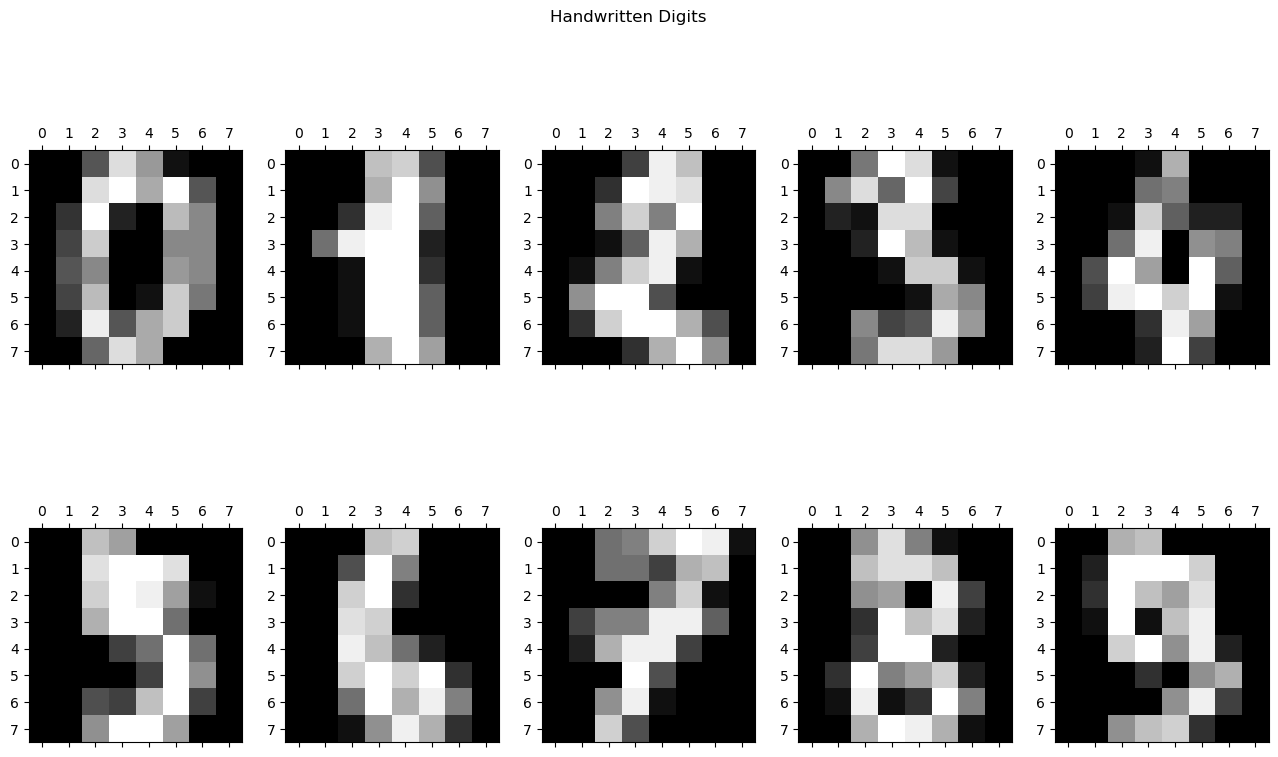

In [34]:
# Display the first digit
plt.gray()
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,9))
fig.suptitle('Handwritten Digits')
for i in range(2): 
    for j in range(5):
        if(i==0):
            axs[i,j].matshow(digits.images[j])
        else:
            axs[i,j].matshow(digits.images[j+5])
plt.show()

En la siguiente figura se puede observar que las muestras de dígitos no siguen un patrón con respecto a la posición en la matriz. Por ejemplo, en un principio los dígitos en las posiciones múltiplos de 10 se encuentra la figura del dígito 0, sin embargo, luego de ciertas iteraciones los dígitos empiezan a cambiar a otras instancias distintas de 0.

<Figure size 640x480 with 0 Axes>

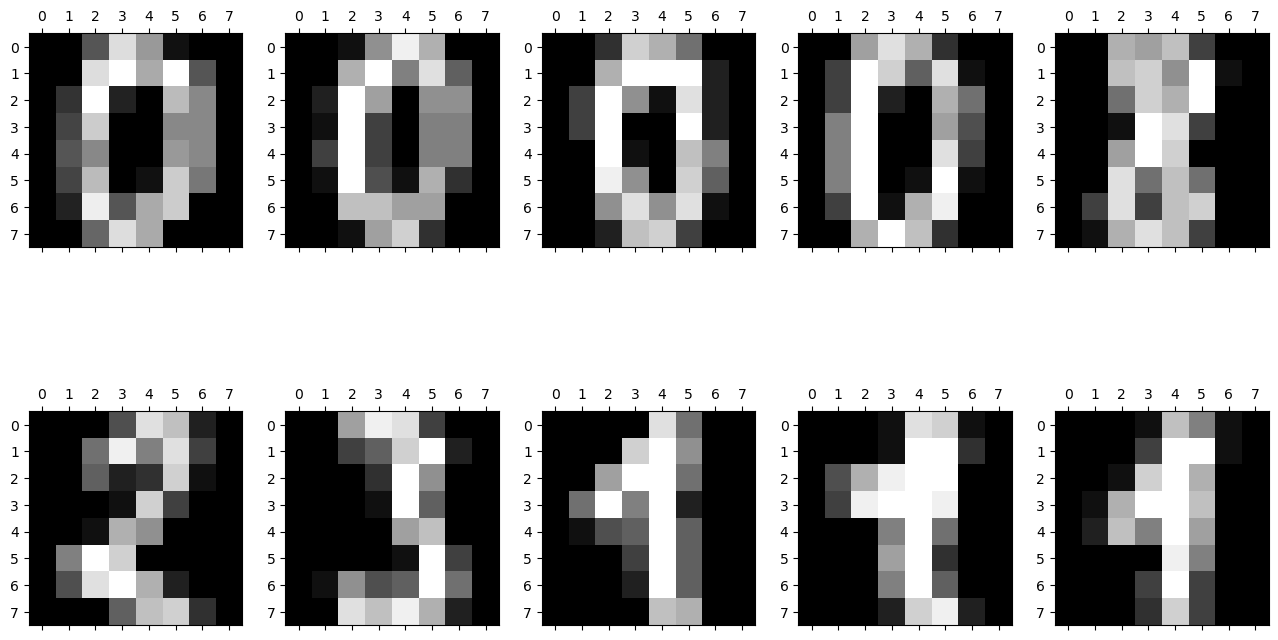

In [35]:
plt.gray()
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,9))
for i in range(2):
    for j in range(5):
        if(i==0):
            axs[i,j].matshow(digits.images[j*10])
        else:
            axs[i,j].matshow(digits.images[(j+5)*10])
plt.show()

Como observamos anteriormente, los digitos están representados por imagenes de 64 pixeles que describirán la forma del dígito en especifico; esto se puede traducir a 64 características en las que cada característica contendrá el valor del pixel. 

A continuación se presenta la matriz de muestras $X$ con sus 64 características y su respectivo objetivo.

In [36]:
digits_df = load_digits(as_frame=True)
digits_df.frame.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


### Estandarización de datos

In [37]:
standarized_digits = StandardScaler().fit_transform(X=digits.data)
pd.DataFrame(standarized_digits, columns=digits_df.data.columns)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


### División de datos

A continuación se separarán los datos en bloques de entrenamiento y de testing para poder evaluar el rendimiento de los modelos.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(standarized_digits, digits.target, test_size=0.2, random_state=42)

### Regresión logística

A continuación se desarrollan 10 clasificadores diferentes (porque se tienen 10 clases) implementando la función de decisión de clase: escogiendo como clase la salida correspondiente al clasificador con mayor probabilidad.

Para ello, se convierten los datos del vector $Y$. Por ejemplo, en el primer clasificador que corresponde al clasificador de dígitos $0$, todos los dígitos diferentes a $0$ se clasificarán como el dígito $1$.

En los siguientes clasificadores se sigue la misma lógica con la única diferencia de que todos los dígitos diferentes al que se evalúa en el respectivo clasificador se clasificarán como $0$.

In [73]:
# Classifier for identifying the digit 0
# We will create a new target variable that is 0 when the digit is 0 and 1 otherwise
y_train_0 = (y_train != 0).astype(int)
y_test_0 = (y_test != 0).astype(int)
# Train the classifier
classifier_1 = LogisticRegression(random_state=42).fit(X_train, y_train_0)

probabilities = classifier_1.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '1'])
probabilities_df['target'] = y_test_0
probabilities_df['predicted'] = classifier_1.predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(25)

,0,1,target,predicted,real
0,2.784627e-04,0.999722,1,1,6
1,1.393200e-03,0.998607,1,1,9
2,1.700980e-07,1.000000,1,1,3
3,9.966439e-04,0.999003,1,1,7
4,7.360739e-06,0.999993,1,1,2
5,7.920234e-07,0.999999,1,1,1
6,1.957589e-04,0.999804,1,1,5
7,1.132861e-04,0.999887,1,1,2
8,1.226149e-06,0.999999,1,1,5
9,2.044513e-08,1.000000,1,1,2


In [72]:
# Classifier for identifying the digit 1
# We will create a new target variable that is 1 when the digit is 1 and 0 otherwise
y_train_1 = (y_train == 1).astype(int)
y_test_1 = (y_test == 1).astype(int)
# Train the classifier
classifier_1 = LogisticRegression(random_state=42).fit(X_train, y_train_1)

probabilities = classifier_1.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '1'])
probabilities_df['target'] = y_test_1
probabilities_df['predicted'] = classifier_1.predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(25)

,0,1,target,predicted,real
0,0.999987,1.254637e-05,0,0,6
1,0.999999,9.375449e-07,0,0,9
2,0.999999,6.257312e-07,0,0,3
3,0.999960,4.044120e-05,0,0,7
4,0.999998,1.526590e-06,0,0,2
5,0.081580,9.184198e-01,1,1,1
6,0.999931,6.859354e-05,0,0,5
7,0.999935,6.478271e-05,0,0,2
8,0.999999,1.354106e-06,0,0,5
9,1.000000,1.270228e-09,0,0,2


In [64]:
# Classifier for identifying the digit 2
# We will create a new target variable that is 2 when the digit is 2 and 0 otherwise
y_train_2 = np.where(y_train == 2, 2, 0)
y_test_2 = np.where(y_test == 2, 2, 0)

# Train the classifier
classifier_2 = LogisticRegression(random_state=42).fit(X_train, y_train_2)

# Evaluate the classifier
probabilities = classifier_2.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '1'])
probabilities_df['target'] = y_test_2
probabilities_df['predicted'] = classifier_2.predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(25)

,0,2,target,predicted,real
0,0.999997,3.257713e-06,0,0,6
1,0.999999,1.121999e-06,0,0,9
2,0.999939,6.071941e-05,0,0,3
3,0.999895,1.054203e-04,0,0,7
4,0.148135,8.518653e-01,2,2,2
5,0.494572,5.054275e-01,0,2,1
6,0.999998,2.431200e-06,0,0,5
7,0.097767,9.022329e-01,2,2,2
8,1.000000,4.203179e-07,0,0,5
9,0.006546,9.934535e-01,2,2,2


In [65]:
# Classifier for identifying the digit 3
# We will create a new target variable that is 3 when the digit is 3 and 0 otherwise
y_train_3 = np.where(y_train == 3, 3, 0)
y_test_3 = np.where(y_test == 3, 3, 0)

# Train the classifier
classifier_3 = LogisticRegression(random_state=42).fit(X_train, y_train_3)

# Evaluate the classifier
probabilities = classifier_3.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '3'])
probabilities_df['target'] = y_test_3
probabilities_df['predicted'] = classifier_3.predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(25)

,0,3,target,predicted,real
0,0.999999,8.136240e-07,0,0,6
1,0.999631,3.690614e-04,0,0,9
2,0.000346,9.996538e-01,3,3,3
3,0.999894,1.064981e-04,0,0,7
4,0.956580,4.342031e-02,0,0,2
5,1.000000,3.016210e-09,0,0,1
6,0.999113,8.867724e-04,0,0,5
7,0.881321,1.186786e-01,0,0,2
8,0.999911,8.920519e-05,0,0,5
9,0.620206,3.797938e-01,0,0,2


In [66]:
# Classifier for identifying the digit 4
# We will create a new target variable that is 4 when the digit is 4 and 0 otherwise
y_train_4 = np.where(y_train == 4, 4, 0)
y_test_4 = np.where(y_test == 4, 4, 0)

# Train the classifier
classifier_4 = LogisticRegression(random_state=42).fit(X_train, y_train_4)

# Evaluate the classifier
probabilities = classifier_4.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '4'])
probabilities_df['target'] = y_test_4
probabilities_df['predicted'] = classifier_4.predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(25)

,0,4,target,predicted,real
0,0.999935,6.473550e-05,0,0,6
1,0.999586,4.137359e-04,0,0,9
2,1.000000,3.149690e-09,0,0,3
3,0.999964,3.616839e-05,0,0,7
4,1.000000,3.096371e-11,0,0,2
5,0.999797,2.032033e-04,0,0,1
6,0.999999,1.112351e-06,0,0,5
7,0.999999,1.349360e-06,0,0,2
8,0.999888,1.116772e-04,0,0,5
9,1.000000,2.996728e-07,0,0,2


In [67]:
# Classifier for identifying the digit 5
# We will create a new target variable that is 5 when the digit is 5 and 0 otherwise
y_train_5 = np.where(y_train == 5, 5, 0)
y_test_5 = np.where(y_test == 5, 5, 0)

# Train the classifier
classifier_5 = LogisticRegression(random_state=42).fit(X_train, y_train_5)

# Evaluate the classifier
probabilities = classifier_5.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '5'])
probabilities_df['target'] = y_test_5
probabilities_df['predicted'] = classifier_5.predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(25)

,0,5,target,predicted,real
0,0.999846,1.538267e-04,0,0,6
1,0.532920,4.670803e-01,0,0,9
2,0.999537,4.632697e-04,0,0,3
3,0.996511,3.489038e-03,0,0,7
4,0.999848,1.515226e-04,0,0,2
5,0.991469,8.530966e-03,0,0,1
6,0.000415,9.995854e-01,5,5,5
7,0.999996,4.219251e-06,0,0,2
8,0.002964,9.970360e-01,5,5,5
9,0.999558,4.416374e-04,0,0,2


In [68]:
# Classifier for identifying the digit 6|
# We will create a new target variable that is 6 when the digit is 6 and 0 otherwise
y_train_6 = np.where(y_train == 6, 6, 0)
y_test_6 = np.where(y_test == 6, 6, 0)

# Train the classifier
classifier_6 = LogisticRegression(random_state=42).fit(X_train, y_train_6)

# Evaluate the classifier
probabilities = classifier_6.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '6'])
probabilities_df['target'] = y_test_6
probabilities_df['predicted'] = classifier_6.predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(25)

,0,6,target,predicted,real
0,0.007025,9.929752e-01,6,6,6
1,1.000000,9.895282e-10,0,0,9
2,0.999994,6.193103e-06,0,0,3
3,0.999999,9.845437e-07,0,0,7
4,0.999925,7.491450e-05,0,0,2
5,0.996418,3.582440e-03,0,0,1
6,0.999991,9.301746e-06,0,0,5
7,0.999996,3.903200e-06,0,0,2
8,0.999916,8.362729e-05,0,0,5
9,1.000000,2.251775e-08,0,0,2


In [69]:
# Classifier for identifying the digit 7
# We will create a new target variable that is 7 when the digit is 7 and 0 otherwise
y_train_7 = np.where(y_train == 7, 7, 0)
y_test_7 = np.where(y_test == 7, 7, 0)

# Train the classifier
classifier_7 = LogisticRegression(random_state=42).fit(X_train, y_train_7)

# Evaluate the classifier
probabilities = classifier_7.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '7'])
probabilities_df['target'] = y_test_7
probabilities_df['predicted'] = classifier_7.predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(25)

,0,7,target,predicted,real
0,0.999886,1.135827e-04,0,0,6
1,0.999968,3.165516e-05,0,0,9
2,0.999849,1.507200e-04,0,0,3
3,0.182639,8.173605e-01,7,7,7
4,0.999999,8.206875e-07,0,0,2
5,1.000000,9.173672e-13,0,0,1
6,0.999865,1.351437e-04,0,0,5
7,0.999922,7.792379e-05,0,0,2
8,0.995161,4.839063e-03,0,0,5
9,0.993476,6.523532e-03,0,0,2


In [70]:
# Classifier for identifying the digit 8
# We will create a new target variable that is 8 when the digit is 8 and 0 otherwise
y_train_8 = np.where(y_train == 8, 8, 0)
y_test_8 = np.where(y_test == 8, 8, 0)

# Train the classifier
classifier_8 = LogisticRegression(random_state=42).fit(X_train, y_train_8)

# Evaluate the classifier
probabilities = classifier_8.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '8'])
probabilities_df['target'] = y_test_8
probabilities_df['predicted'] = classifier_8.predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(25)

,0,8,target,predicted,real
0,0.999346,6.535284e-04,0,0,6
1,0.999744,2.561077e-04,0,0,9
2,0.992875,7.125122e-03,0,0,3
3,0.999982,1.771214e-05,0,0,7
4,0.997726,2.274048e-03,0,0,2
5,0.986634,1.336635e-02,0,0,1
6,0.997636,2.363819e-03,0,0,5
7,0.999997,3.192941e-06,0,0,2
8,0.999994,6.307887e-06,0,0,5
9,0.999999,1.492059e-06,0,0,2


In [71]:
# Classifier for identifying the digit 9
# We will create a new target variable that is 9 when the digit is 9 and 0 otherwise
y_train_9 = np.where(y_train == 9, 9, 0)
y_test_9 = np.where(y_test == 9, 9, 0)

# Train the classifier
classifier_9 = LogisticRegression(random_state=42).fit(X_train, y_train_9)

# Evaluate the classifier
probabilities = classifier_9.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '9'])
probabilities_df['target'] = y_test_9
probabilities_df['predicted'] = classifier_9.predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(25)

,0,9,target,predicted,real
0,0.999284,7.163400e-04,0,0,6
1,0.010958,9.890419e-01,9,9,9
2,0.997280,2.719989e-03,0,0,3
3,0.815110,1.848895e-01,0,0,7
4,0.999996,3.518850e-06,0,0,2
5,0.999956,4.351728e-05,0,0,1
6,0.999598,4.024326e-04,0,0,5
7,0.999445,5.549131e-04,0,0,2
8,1.000000,3.992051e-07,0,0,5
9,1.000000,6.860817e-13,0,0,2


## Regresión Lineal

In [40]:
# Loading the regression data
data = pd.read_csv('RegressionData.csv')

# Displaying the first 5 rows of the data
data.head(5)

,X1,X2,y
0,53.766714,1.347397,0.594013
1,183.388501,-1.338226,0.505659
2,-225.884686,-0.800645,0.253316
3,86.217332,-1.343605,0.453381
4,31.876524,1.151258,1.720519
